<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-029.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-030.png" class="img-responsive"/>
</div>


---


<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-001.png" class="img-responsive"/>
</div>
<div style="text-align: center">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-002.png" class="img-responsive"/>
</div>
<div style="display: flex; justify-content: center;">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-003.png"/>
</div>
<div style="display: block;margin-left: auto;margin-right: auto;width: 50%;">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-004.png"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-005.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-006.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-007.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-008.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-009.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-010.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-011.png" class="img-responsive"/>
</div>


In [134]:
import os

try:
    import google.colab
    REPO_URL = "https://github.com/wtheisen/nd-cse-10124-lectures.git"

    REPO_NAME = "nd-cse-10124-lectures"
    L_PATH = "nd-cse-10124-lectures/Datasets"

    # Clone repo if not already present
    if not os.path.exists(REPO_NAME):
      !git clone {REPO_URL}

    # cd into the homework folder
    %cd {L_PATH}
    !pwd

except ImportError:
    pass

def get_lines_list(source_file): # Define a function named 'get_lines_list' that takes an argument called 'source_file'
    lines = [] # Create a variable named 'lines' points to a list data structure
    with open(source_file) as f:
        for line in f: # For each item in the variable 'f', set the variable named 'line' equal to it, one by one
            lines.append(line.strip().split()) # Add the content of the variable 'line' to the end of the list named 'lines' (after removing whitespace on either end and splitting it into words)

    return lines # This function returns the variable named 'lines'

jabber_lines = get_lines_list('jabberwocky.txt')
print(jabber_lines)

shakespeare_lines = get_lines_list('shakespeare.txt')


Cloning into 'nd-cse-10124-lectures'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 46 (delta 10), reused 43 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 14.27 MiB | 32.39 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/nd-cse-10124-lectures/Datasets/nd-cse-10124-lectures/Datasets/nd-cse-10124-lectures/Datasets
/content/nd-cse-10124-lectures/Datasets/nd-cse-10124-lectures/Datasets/nd-cse-10124-lectures/Datasets
[['"Jabberwocky"'], ['by', 'Lewis', 'Carroll'], [], ["'Twas", 'brillig,', 'and', 'the', 'slithy', 'toves'], ['Did', 'gyre', 'and', 'gimble', 'in', 'the', 'wabe;'], ['All', 'mimsy', 'were', 'the', 'borogoves,'], ['And', 'the', 'mome', 'raths', 'outgrabe.'], [], ['"Beware', 'the', 'Jabberwock,', 'my', 'son!'], ['The', 'jaws', 'that', 'bite,', 'the', 'claws', 'that', 'catch!'], ['Beware', 'the', 'Jubjub', 'bird,', 'and', 'shun'], ['The', 'frumiou

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-012.png" class="img-responsive"/>
</div>

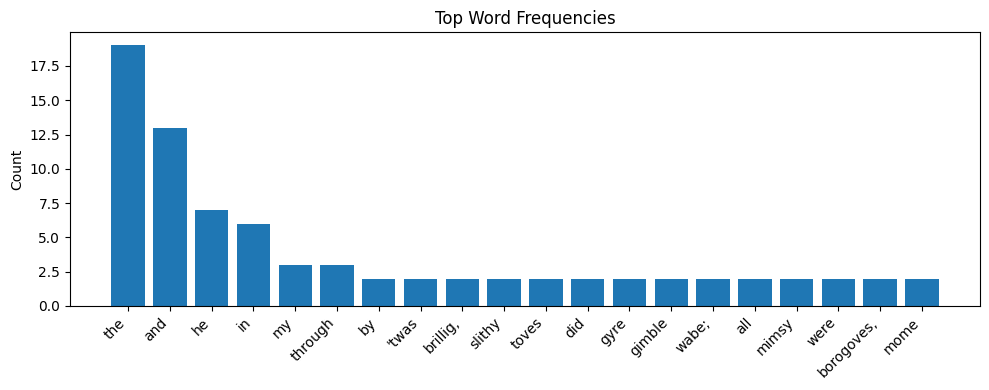

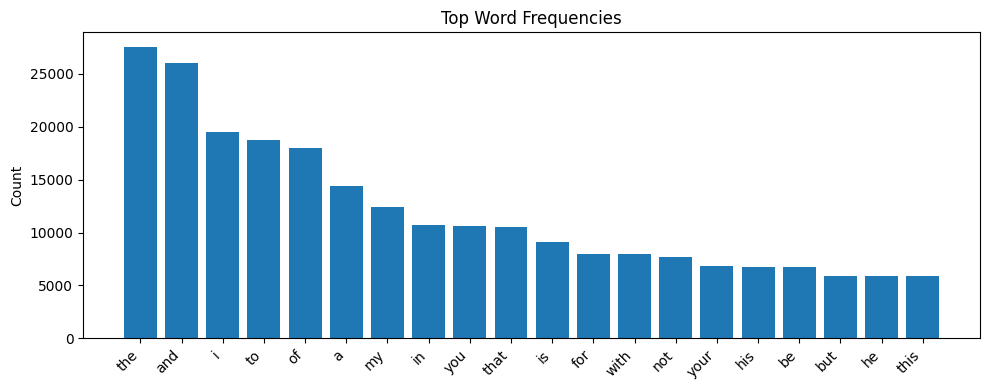

In [135]:
import matplotlib.pyplot as plt

from collections import Counter

def plot_top_words(
    lines,
    top_k=20,
    ignore_stopwords=False,
    stopwords=None,
    title="Top Word Frequencies"
):
    """
    lines: List[List[str]] — tokenized text (one list per line)
    """

    # Flatten words
    words = [w.lower() for line in lines for w in line]

    if ignore_stopwords:
        words = [w for w in words if w not in stopwords]

    counts = Counter(words)
    most_common = counts.most_common(top_k)

    if not most_common:
        raise ValueError("No words left after filtering.")

    labels, values = zip(*most_common)

    plt.figure(figsize=(10, 4))
    plt.bar(labels, values)
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Count")
    plt.title(title + (" (no stopwords)" if ignore_stopwords else ""))
    plt.tight_layout()
    plt.show()

plot_top_words(jabber_lines)

plot_top_words(shakespeare_lines)

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-013.png" class="img-responsive"/>
</div>


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{"we'd", 'ain', 'him', 'and', 'of', 'being', 'has', "should've", 'most', 'because', "needn't", 'under', "we've", 'into', 'only', 'both', 'yourselves', 'itself', 'before', 'such', 've', 'are', 'during', 'when', 'an', 'themselves', 'were', 'but', 'own', 'yourself', 'any', 'haven', "i'll", "you'd", "they'd", 'mightn', 'other', 'doesn', "they'll", 'through', 'was', 'do', 'above', "hasn't", 'don', 'over', 'they', "they're", "i've", 'ours', "doesn't", 'on', "she'd", 'weren', 'you', 'or', 'hers', 'so', 'needn', 'why', 'up', 'hasn', "he's", "he'll", 'this', 'very', 'been', 'with', 'more', 'in', 'theirs', "don't", 'having', 'few', 'just', 'it', "it's", 'for', 'same', 'then', 'll', 'ma', 'am', 'the', "you'll", 'me', 'what', 'wouldn', 'too', 'his', 'who', 'there', 'down', "we're", 'isn', "it'll", 'some', 'our', "isn't", 'she', 'have', 'herself', 'after', 'shan', 'wasn', 'below', 'their', "haven't", 'is', "they've", 'now', 'doing', 'as', 'than', "i'm", 'where', 'will', 'from', 't', 'hadn', 'o', "c

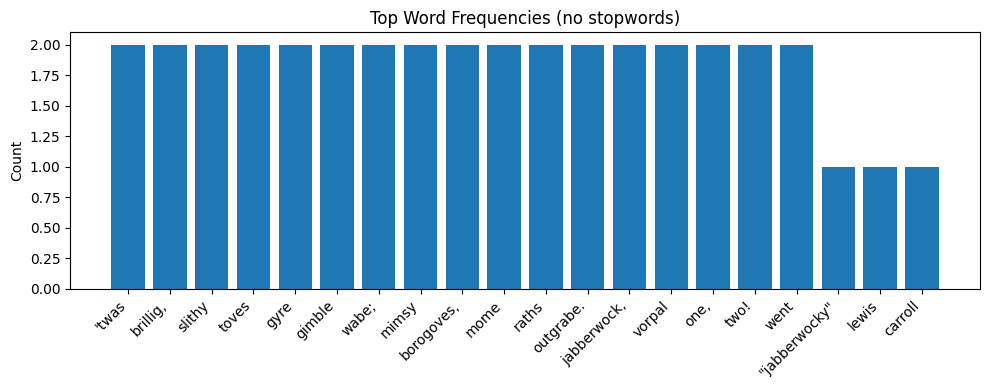

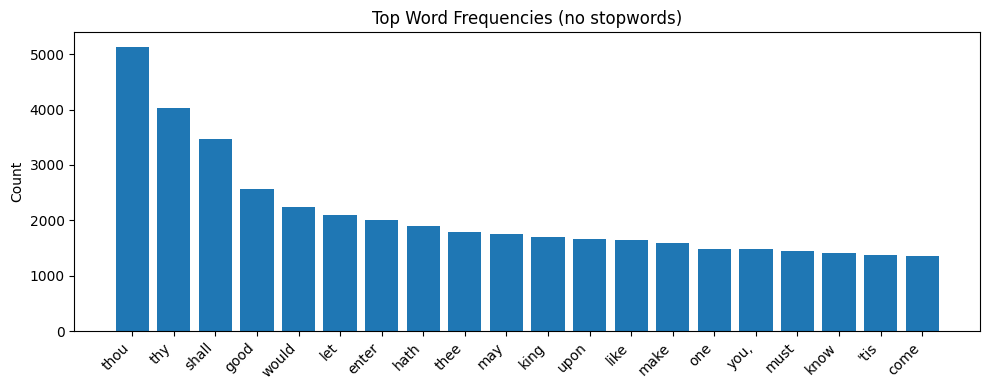

In [136]:
import nltk
nltk.download("stopwords")

from nltk.corpus import stopwords

NLTK_STOPWORDS = set(stopwords.words("english"))

print(NLTK_STOPWORDS)

plot_top_words(jabber_lines, ignore_stopwords=True, stopwords=NLTK_STOPWORDS)
plot_top_words(shakespeare_lines, ignore_stopwords=True, stopwords=NLTK_STOPWORDS)

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-014.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-015.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-016.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-017.png" class="img-responsive"/>
</div>
<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-018.png" class="img-responsive"/>
</div>


In [138]:
meow = 'dog'
print(meow)
print('kitty' + meow)

num = 67
print(num)
num = 5

num_2 = 3
print(num + num_2)

boolean = True
print(boolean & True)

dog
kittydog
67
8
True


<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-019.png" class="img-responsive"/>
</div>

In [139]:
print(type(meow))
print(type(num))
print(type(boolean))

print(5 + 'cat')

<class 'str'>
<class 'int'>
<class 'bool'>


TypeError: unsupported operand type(s) for +: 'int' and 'str'

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-020.png" class="img-responsive"/>
</div>

In [142]:
i_like_cats = 5

if i_like_cats > 4:
  print('meow')

if i_like_cats:
  print('meow')
else:
  print('woof')

meow
meow


<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-021.png" class="img-responsive"/>
</div>

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-022.png" class="img-responsive"/>
</div>

In [147]:
animals = ['cat', 'dog', 'fish', 1]
print(type(animals))
print(animals)
print(animals[3])

<class 'list'>
['cat', 'dog', 'fish', 1]
1


<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-023.png" class="img-responsive"/>
</div>

In [148]:
animal_noises = {
    'cat': 'meow',
    'dog': 'woof',
    'fish': 'blub'
}

print(type(animal_noises))
print(animal_noises['cat'])

animal_count = {
    'cat': 5,
    'dog': 3,
    'fish': 1
}

print(type(animal_count))
print(animal_count['cat'])

<class 'dict'>
meow
<class 'dict'>
5


<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-024.png" class="img-responsive"/>
</div>

In [153]:
animals = ['melvin', 'michael', 'tom']
for animal in animals:
  print(animal)

for animal, noise in animal_noises.items():
  print(animal, noise)

for animal in animal_noises.values():
  print(animal)

melvin
michael
tom
cat meow
dog woof
fish blub
meow
woof
blub


<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-025.png" class="img-responsive"/>
</div>

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-026.png" class="img-responsive"/>
</div>

In [164]:
def get_lines_list(source_file): # Define a function named 'get_lines_list' that takes an argument called 'source_file'
    lines = [] # Create a variable named 'lines' points to a list data structure
    with open(source_file) as f:
        for line in f: # For each item in the variable 'f', set the variable named 'line' equal to it, one by one
            lines.append(line.strip().split()) # Add the content of the variable 'line' to the end of the list named 'lines' (after removing whitespace on either end and splitting it into words)

    return lines # This function returns the variable named 'lines'

print(get_lines_list('jabberwocky.txt'))
#print(get_lines_list('shakespeare.txt'))

[['"Jabberwocky"'], ['by', 'Lewis', 'Carroll'], [], ["'Twas", 'brillig,', 'and', 'the', 'slithy', 'toves'], ['Did', 'gyre', 'and', 'gimble', 'in', 'the', 'wabe;'], ['All', 'mimsy', 'were', 'the', 'borogoves,'], ['And', 'the', 'mome', 'raths', 'outgrabe.'], [], ['"Beware', 'the', 'Jabberwock,', 'my', 'son!'], ['The', 'jaws', 'that', 'bite,', 'the', 'claws', 'that', 'catch!'], ['Beware', 'the', 'Jubjub', 'bird,', 'and', 'shun'], ['The', 'frumious', 'Bandersnatch!"'], [], ['He', 'took', 'his', 'vorpal', 'sword', 'in', 'hand:'], ['Long', 'time', 'the', 'manxome', 'foe', 'he', 'sought—'], ['So', 'rested', 'he', 'by', 'the', 'Tumtum', 'tree,'], ['And', 'stood', 'awhile', 'in', 'thought.'], [], ['And', 'as', 'in', 'uffish', 'thought', 'he', 'stood,'], ['The', 'Jabberwock,', 'with', 'eyes', 'of', 'flame,'], ['Came', 'whiffling', 'through', 'the', 'tulgey', 'wood,'], ['And', 'burbled', 'as', 'it', 'came!'], [], ['One,', 'two!', 'One,', 'two!', 'And', 'through', 'and', 'through'], ['The', 'vorpa

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-027.png" class="img-responsive"/>
</div>


In [162]:
from collections import defaultdict, Counter

def build_graph_word(lines, graph=None):
  if not graph:
    graph = defaultdict(Counter) #{'<SOS>': {'I': 37, 'The': 64}}

  for line in lines:
      if line:
        graph['<SOS>'][line[0]] += 1

        for idx in range(0, len(line) - 1):
          curr_token = line[idx]
          next_token = line[idx + 1]

          graph[curr_token][next_token] += 1

        graph[line[-1]]['<EOS>'] += 1

  return graph

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-028.png" class="img-responsive"/>
</div>

<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-032.png" class="img-responsive"/>
</div>

In [171]:
import random

def generate_word_sequence(graph, max_token_length):
  output = ['<SOS>']

  while output[-1] != '<EOS>':
    token_neighbors = graph[output[-1]]

    output += random.choices(list(token_neighbors.keys()), weights=list(token_neighbors.values()), k=1)

    if len(output) > max_token_length:
      break

  return ' '.join(output)

# dataset = 'jabberwocky.txt'
# word_graph = build_graph_word(dataset)
# print('Word Level Generation [jabberwocky.txt]:')
# for i in range(0, 7):
#   print(f'\t{generate_word_sequence(word_graph, 10)}')

#shakespeare_lines = get_lines_list('shakespeare.txt')
#word_graph = build_graph_word(shakespeare_lines[250:3500])

zoomer_lines = get_lines_list('zoomer.txt')
word_graph = build_graph_word(zoomer_lines, word_graph)
print(len(word_graph))
#word_graph = build_graph_word('shakespeare.txt', word_graph)
# print()
# print('Word Level Generation [jabberwocky.txt, shakespeare.txt]:')
# for i in range(0, 7):
#   print(f'\t{generate_word_sequence(word_graph, 10)}')

print()
print('Word Level Generation [shakespeare.txt, zoomer.txt]:')
for i in range(0, 7):
  print(f'\t{generate_word_sequence(word_graph, 50)}')

8967

Word Level Generation [shakespeare.txt, zoomer.txt]:
	<SOS> I’m hanging out of my heaven shines, <EOS>
	<SOS> That performance had a new gaming gear. <EOS>
	<SOS> Time to go, CUL! <EOS>
	<SOS> Let’s chat about quantum physics, MEGO. <EOS>
	<SOS> To swear against the breach yourselves <EOS>
	<SOS> I’m not great, but I have an AE that thou must be, <EOS>
	<SOS> IDC what anyone thinks, he’s actually won the meeting!’ <EOS>


<div class="thumbnail">
    <img src="https://williamtheisen.com/nd-cse-10124-lectures/Lecture_Images/Lecture02/slide-033.png" class="img-responsive"/>
</div>

In [173]:
def get_lines_str(source_file):
    with open(source_file) as f:
        for line in f:
            yield line.strip()

def build_graph_char(source_file, graph=None):
  lines = list(get_lines_str(source_file))

  if not graph:
    graph = defaultdict(Counter)

  for line in lines:
      if line:
        graph['<SOS>'][line[0]] += 1

        for idx in range(0, len(line) - 1):
          curr_token = line[idx]
          next_token = line[idx + 1]

          graph[curr_token][next_token] += 1

        graph[line[-1]]['<EOS>'] += 1

  return graph

dataset = 'jabberwocky.txt'
char_graph = build_graph_char(dataset)

import random
def generate_char_sequence(graph, max_token_length):
  output = '<SOS> '

  while output[-1] != '>':
    token_neighbors = graph[output[-1]]

    output += random.choices(list(token_neighbors.keys()), weights=list(token_neighbors.values()), k=1)[0]

    if len(output) > max_token_length:
      break

  return output

print('Character Level Generation:')
for i in range(0, 7):
  print(f'\t{generate_char_sequence(char_graph, 100)}')

Character Level Generation:
	<SOS> at—<EOS>
	<SOS> throus ms,<EOS>
	<SOS> od Th! t Can s the hirabrbbord sock.<EOS>
	<SOS> ck!<EOS>
	<SOS> ind, wock.<EOS>
	<SOS> Jame wod s the and:<EOS>
	<SOS> twed<EOS>


## Export to HTML

Uncomment the final line of the cell below and run it to export this notebook to HTML

In [ ]:
import os, json

def export_notebook():
  L_PATH = "nd-cse-10124-lectures/Notebooks"
  L = "Lecture_02_Text_as_Data"

  try:
      from google.colab import _message, files

      # where you WANT it to live (repo folder)
      repo_ipynb_path = f"/content/{L_PATH}/{L}.ipynb"

      # grab current notebook contents from the UI
      nb = _message.blocking_request("get_ipynb", timeout_sec=1)["ipynb"]

      # write it into the repo folder as a real file
      os.makedirs(os.path.dirname(repo_ipynb_path), exist_ok=True)
      with open(repo_ipynb_path, "w", encoding="utf-8") as f:
          json.dump(nb, f)

      # convert + download pdf
      !jupyter nbconvert --to html "{repo_ipynb_path}"
      files.download(repo_ipynb_path.replace(".ipynb", ".html"))
  except:
      import subprocess

      nb_fp = os.getcwd() + f'{L}.ipynb'
      print(os.getcwd())

      subprocess.run(["jupyter", "nbconvert", "--to", "html", nb_fp], check=True)

#export_notebook()